In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import os
from common import *
import pandas as pd
#from mpl_toolkits.mplot3d import Axes3D
from sklearn.linear_model import Lasso, Ridge, LinearRegression

print(f"Root directory: {os.getcwd()}")

plt.rcParams.update({
    "text.usetex": True,
    "font.family": "serif",
    "font.serif": ["Palatino"],
    "font.size": 10,
})

#%matplotlib inline 

Root directory: c:\Users\andre\Dropbox\FYS-STK4155_projects\FYS-STK4155 - Project1\FYS-STK4155-Prj1_report\code


### Global variables 

#  Franke function 3D preview
First we plot a 3D plot of the franke function.
The plot is based on the provided code in the assignmentext for plotting the franke function 

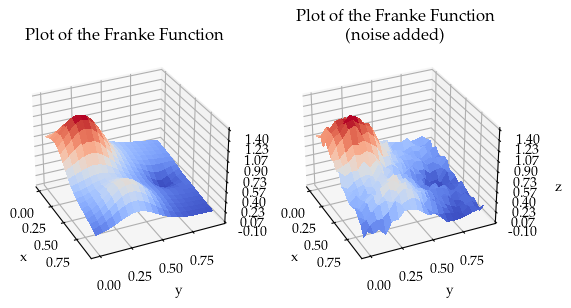

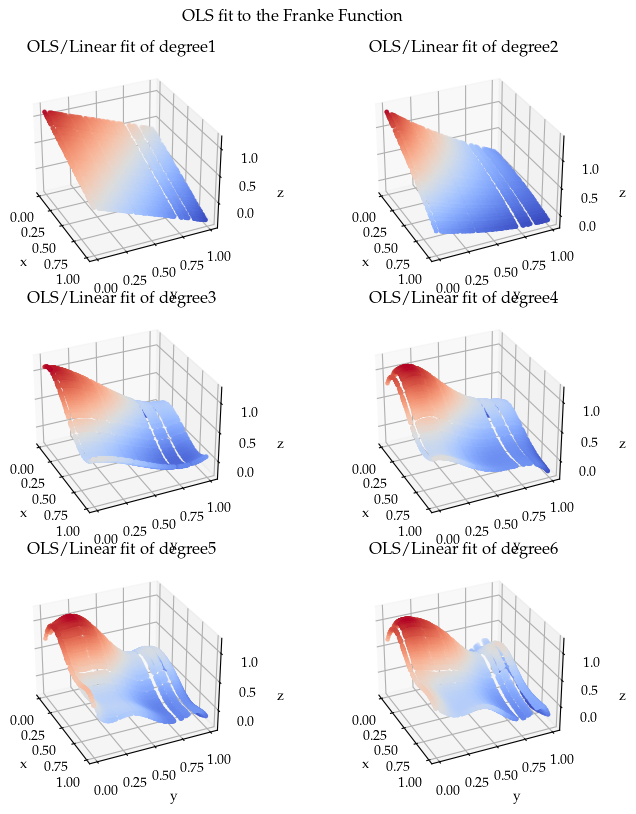

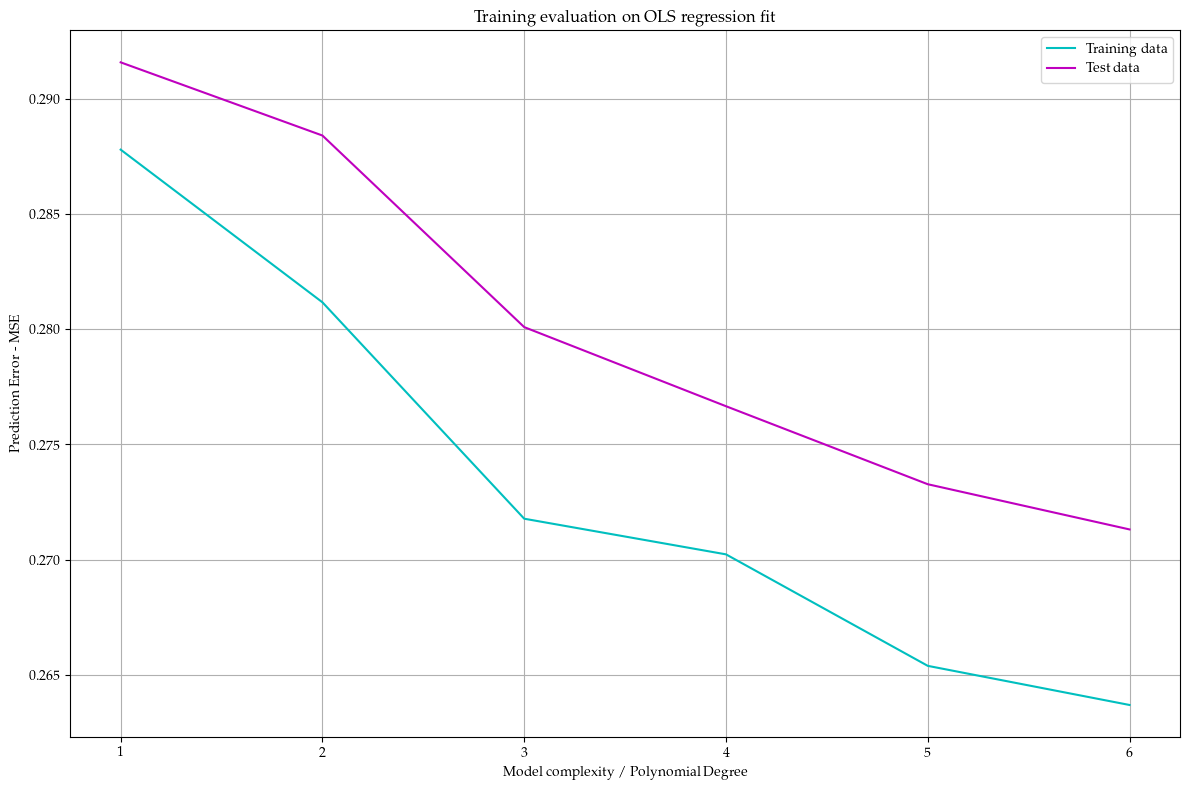

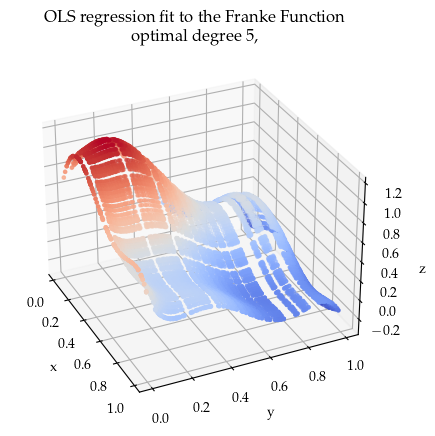

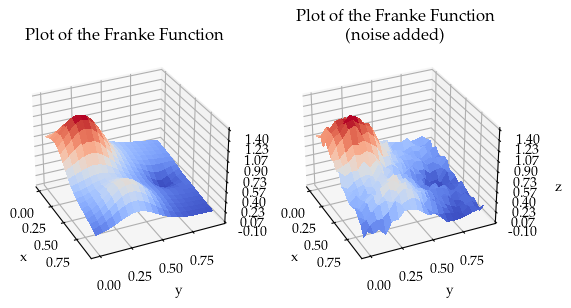

In [11]:
# Preview plot of the franke function
#%matplotlib
np.random.seed(4155)
y = x = np.arange(0, 1, 0.05)
x, y = np.meshgrid(x,y)
z = FrankeFunction(x, y)
noise_mesh = 0.05 * np.random.randn(z.shape[0], z.shape[1]) # Stochastic noise
z_noisy = z + noise_mesh

fig = plt.figure()
# Ploting frankefunction without noise
ax1 = fig.add_subplot(1,2,1, projection='3d') # Are :)steike
ax1.title.set_text("Plot of the Franke Function")
ax1.view_init(elev=30., azim=-25.0)
ax1.set_xlabel("x"); ax1.set_ylabel("y"); ax1.set_zlabel("z")
surf1 = ax1.plot_surface(x,y,z, cmap=cm.coolwarm, linewidth = 0, antialiased=False)
# Customize the z axis.
ax1.set_zlim(-0.10, 1.40)
ax1.zaxis.set_major_locator(LinearLocator(10))
ax1.zaxis.set_major_formatter(FormatStrFormatter('%.02f'))

# Ploting frankefunction with noise
ax2 = fig.add_subplot(1,2,2, projection='3d')
ax2.title.set_text("Plot of the Franke Function\n(noise added)")
ax2.view_init(elev=30., azim=-25.0)
ax2.set_xlabel("x"); ax2.set_ylabel("y"); ax2.set_zlabel("z")
surf2 = ax2.plot_surface(x,y,z_noisy, cmap=cm.coolwarm, linewidth = 0, antialiased=False)
# Customize the z axis.
ax2.set_zlim(-0.10, 1.40)
ax2.zaxis.set_major_locator(LinearLocator(10))
ax2.zaxis.set_major_formatter(FormatStrFormatter('%.02f'))
plt.savefig(f"{REPORT_FIGURES}franke_function_preview.pdf")
plt.show()

# 1 - Ordinary Least Squeares (OLS)

## 1.1 Data
Defining and creating the data


In [3]:
np.random.seed(4155)
n = 100 # The number of point in the franke function
x = np.random.rand(n)
y = np.random.rand(n)
x, y = np.meshgrid(x,y)
z = FrankeFunction(x, y) 
noise = 0.5 * np.random.randn(n) # Stochastic noise
#noise = 0.7 * np.random.randn(n) # Stochastic noise
z += noise # Adding stochastic noise

## 1.2 Plot of fit for all degrees before evaluation
 We plot the fit up to degree 6 to get an intuition on the curvature of the fitted models

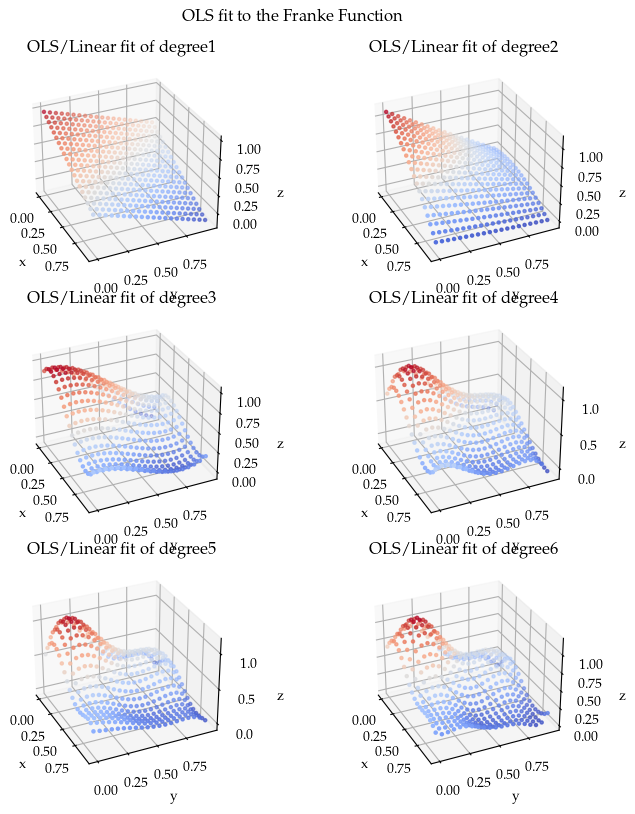

In [12]:
fig = plt.figure(figsize=(8,8))
degrees = 6
z_train_OLS = pd.DataFrame()
z_hat_train_OLS = pd.DataFrame()
z_test_OLS = pd.DataFrame()
z_hat_test_OLS = pd.DataFrame()

# TODO: Must fix so that training and test data are used. 
# Must evalute model using MSE from traning and test
for degree in range(1, degrees + 1):
    X = create_X(x, y, degree) # Design MatrixS
    model = OLS() # The model
    #model.fit(X, z) # Fitting the model
    model.fit(X, z.ravel()) # Fitting the model
    z_hat = model.predict(X) # predict on train data
    
    # Plot
    ax = fig.add_subplot(3,2, degree, projection='3d')
    ax.view_init(elev=30., azim=-25.0)
    ax.title.set_text(f"OLS/Linear fit of degree{degree}")
    ax.set_xlabel("x"); ax.set_ylabel("y"); ax.set_zlabel("z")
    ax.scatter3D(y, x, z_hat, c=z_hat ,marker = '.', cmap=cm.coolwarm)
fig.suptitle("OLS fit to the Franke Function")
plt.tight_layout()
plt.savefig(f"{REPORT_FIGURES}franke_function_OLS_fit.pdf")
plt.show()

## 1.3 - Finding degree/model complexity for the optimal OLS fit
Approximate the franke function using ordinary least squares
We estimate the franke functinon using polynomials up to 6th degree. We than look at the MSE scores to look for overfitting. We use the MSE score values from the test data to determine overfit together with the curvature of the evaluation plot

### Confidence intervall 
$$CI_{0.95}(\hat\beta_i) = [\hat\beta_i-1.96 SE(\hat\beta_i), \hat\beta_i+1.96 SE(\hat\beta_i)] =\hat\beta_i \pm 1.96\hat \sigma(\hat\beta_i)$$ 
In order to estimate the variance of the $i$-th beta values: $$\sigma^2 (\beta_i ) = \sigma^2 [(X^{T} X)^{-1}]_{ii}$$
However, $\sigma$ is unkown and can be generaly estimated as followed:
$$\hat\sigma^2 = \frac{\sum_{i=0}^{N-1}(y_i - \hat y_i)^2}{N}$$
For simplification purposes, we N instead of N-p-1 in the denominator.<br>
To get the variance estimate of each $\beta$ component one must calculate the variance with respect to the diagonal elements of $(X^TX)^{-1}$ Estimated standard error is the square root of $\hat\sigma^2$, where the estimate for variance $\hat\sigma^2$ is:
$$\hat\sigma^2 = \frac{\sum_{i=0}^{N-1}(y_i - \hat y_i)^2}{N}(X^TX)^{-1}$$
Where y is the true value, and $\hat y$ being the predicted value. <br>
The variance estimate of each $\hat\beta$ estimate can be written as:
$$\hat\sigma_{\hat\beta_i}^2 = \hat\sigma^2(X^TX)_{i,i}^{-1}$$



In [5]:
degrees = 6
z_train_OLS = pd.DataFrame()
z_hat_train_OLS = pd.DataFrame()
z_test_OLS = pd.DataFrame()
z_hat_test_OLS = pd.DataFrame()
coeffs_df = pd.DataFrame()

for degree in range(1, degrees+1):
    X = create_X(x, y, degree) # Design Matrix
    
    # Scaling data and splitting it into training and test sets
    #X_train, X_test, z_train, z_test = prepare_data(X, z, test_size=0.2, shuffle=True, scale_X=False, scale_t=False)
    X_train, X_test, z_train, z_test = prepare_data(X, z.ravel(), test_size=0.2, shuffle=True, scale_X=False, scale_t=False, random_state=4155)
    
    # Model construction, fitting, and predictions
    model = OLS() # The model
    z_hat_train = model.fit(X_train, z_train) # Fitting the model and predict on training data
    z_hat_test = model.predict(X_test) # predict on test data
    
    # Evaluatation metrics
    MSE_score_train = MSE(z_train, z_hat_train)
    R2_score_train = R2(z_train, z_hat_train)
    MSE_score_test = MSE(z_test, z_hat_test)
    R2_score_test = R2(z_test, z_hat_test)
    
    # Estimated standard error for the beta coefficients
    N, P = X_train.shape
    #var_hat = (1/(N-P-1)) * np.sum((z_train - z_hat_train)**2)
    var_hat = (1/N) * np.sum((z_train - z_hat_train)**2) # Estimated variance
    invXTX_diag = np.diag(np.linalg.inv(X_train.T @ X_train)) 
    SE_betas = np.sqrt(var_hat * invXTX_diag) # Standard Error

    # Calculating 95% confidence intervall
    betas = model.get_all_betas()
    CI_lower_all_betas = betas - (1.96 * SE_betas)
    CI_upper_all_betas = betas + (1.96 * SE_betas)
    CL = np.zeros((CI_upper_all_betas.shape[0],2))
    CL[:,0] = CI_lower_all_betas
    CL[:,1] = CI_upper_all_betas
    
    # Printing results
    print(f"Degree: {degree}")
    print(f"Train data - Mean Square Error: {MSE_score_train}")
    print(f"Train data - R2 score: {R2_score_train}")
    print(f"Test data - Mean Square Error: {MSE_score_test}")
    print(f"Test data - R2 score: {R2_score_test}")
    print(f"Estimated variance: {var_hat}")
    print(f"Beta - values{betas}")
    print(f"Beta - Std Errors: {SE_betas}")
    print(f"Beta - Confidence Interval (CI):\n{CL}\n")

    # Constructing dataframe for beta coefficients
    degs = np.zeros(betas.shape[0]); degs.fill(degree)
    df = pd.DataFrame.from_dict({"degree" :degs,
                                 "coeff name": [f"b{i}" for i in range(1,betas.shape[0]+1)],
                                 "coeff value": np.round(betas, decimals=4),
                                 "Std Error": np.round(SE_betas, decimals=4),
                                 "CI lower":np.round(CI_lower_all_betas, decimals=4), 
                                 "CI_upper":np.round(CI_upper_all_betas, decimals=4)},
                                 orient='index').T
    coeffs_df = pd.concat([coeffs_df,df], axis=0)
        
    # Filling up dataframes for train and test evaluation
    z_train_OLS[degree] = z_train.flatten() 
    z_hat_train_OLS[degree] = z_hat_train.flatten()
    z_test_OLS[degree] = z_test.flatten()
    z_hat_test_OLS[degree] = z_hat_test.flatten()


# MSE calculations for all lambda values
mse_scores_train = ((z_train_OLS - z_hat_train_OLS) ** 2).mean()
mse_scores_test = ((z_test_OLS - z_hat_test_OLS) ** 2).mean()
# R2 calculations for all lambda values
R2_scores_train = 1 - ((z_train_OLS - z_hat_train_OLS) ** 2).sum() / ((z_train_OLS - z_train_OLS.mean())**2).sum() 
R2_scores_test = 1 - ((z_test_OLS - z_hat_test_OLS) ** 2).sum() / ((z_test_OLS - z_test_OLS.mean())**2).sum()

Degree: 1
Train data - Mean Square Error: 0.28780349558106605
Train data - R2 score: 0.2409082479178175
Test data - Mean Square Error: 0.29159419096264505
Test data - R2 score: 0.2667757978659183
Estimated variance: 0.28780349558106605
Beta - values[ 1.12729136 -0.75417141 -0.75088713]
Beta - Std Errors: [0.01581619 0.01971841 0.022752  ]
Beta - Confidence Interval (CI):
[[ 1.09629163  1.15829109]
 [-0.79281949 -0.71552333]
 [-0.79548105 -0.7062932 ]]

Degree: 2
Train data - Mean Square Error: 0.2811742584670374
Train data - R2 score: 0.2583930918933792
Test data - Mean Square Error: 0.28841622371681486
Test data - R2 score: 0.2747669121283097
Estimated variance: 0.2811742584670374
Beta - values[ 1.34675299 -1.58756996 -0.89795703  0.38709154  0.91550808 -0.28255178]
Beta - Std Errors: [0.03043398 0.08717879 0.09535843 0.07749327 0.07381501 0.08512052]
Beta - Confidence Interval (CI):
[[ 1.28710239  1.40640358]
 [-1.75844039 -1.41669953]
 [-1.08485954 -0.71105451]
 [ 0.23520474  0.5389

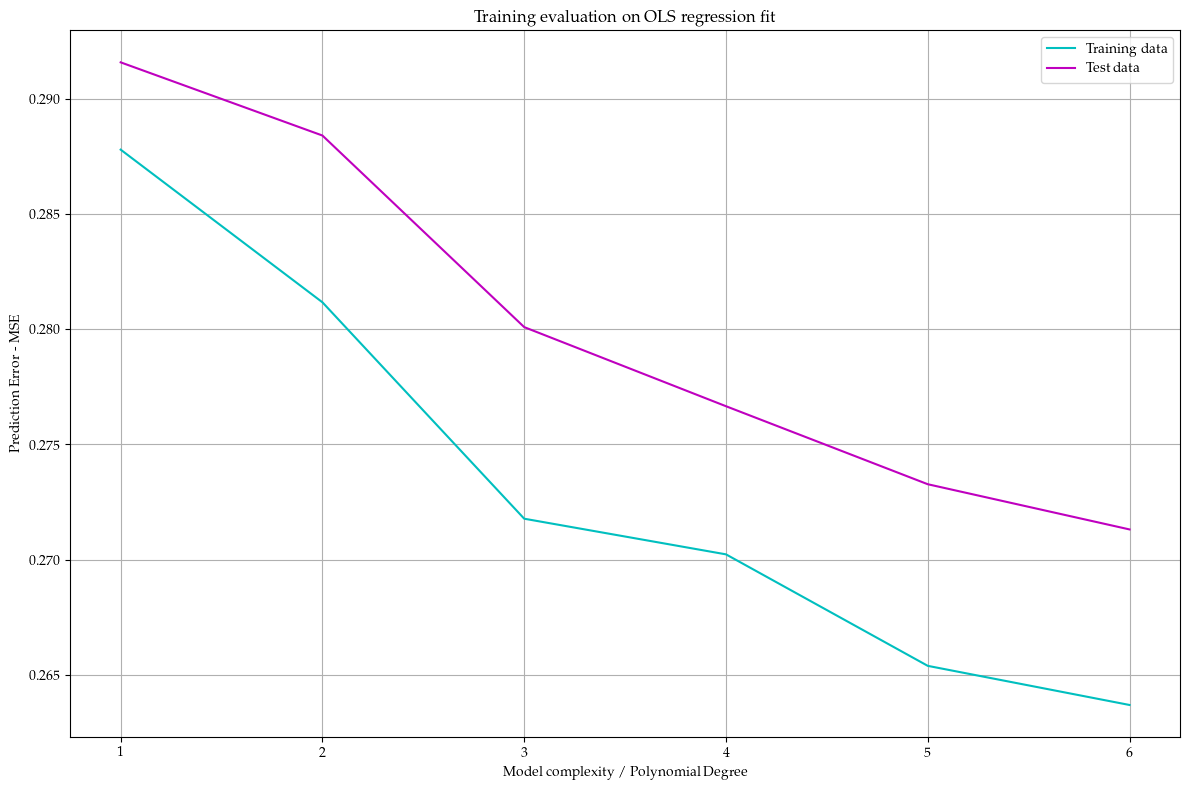

In [13]:
# Plots
plt.figure(figsize=(12,8))
plt.plot(np.arange(1,degrees+1), mse_scores_train, c="c", label="Training data")
plt.plot(np.arange(1,degrees+1), mse_scores_test, c="m", label="Test data")
plt.xlabel("Model complexity / Polynomial Degree")
plt.ylabel("Prediction Error - MSE")
plt.title("Training evaluation on OLS regression fit")
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.savefig(f"{REPORT_FIGURES}franke_function_OLS_evaluate_fit.pdf")
plt.show()

## 1.4 Analysis of plots and training metrics
Do the analysis.......

Conclusion:<br>
Based on the analysis, we conclude that a model complexity of degree 5 yields the most optimal fit.

## 1.5 plot of the model using the most optimal parameters

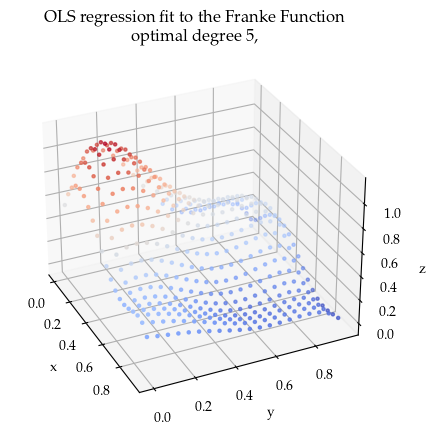

In [14]:
optimal_degree = 5
X = create_X(x, y, optimal_degree) # Design Matrix
model = OLS() # The model
model.fit(X, z.ravel()) # Fitting the model
z_hat = model.predict(X) # predict on train data

# Plot
fig = plt.figure()#figsize=(8,8))
ax = plt.axes(projection='3d')
ax.title.set_text(f"OLS regression fit to the Franke Function\noptimal degree {optimal_degree},")
#ax.view_init(elev=5., azim=85.0)
ax.view_init(elev=30., azim=-25.0)
ax.set_xlabel("x"); ax.set_ylabel("y"); ax.set_zlabel("z")
ax.scatter3D(y, x, z_hat, c=z_hat ,marker = '.', cmap=cm.coolwarm)
plt.savefig(f"{REPORT_FIGURES}franke_function_OLS_best_fit.pdf")
plt.show()

In [8]:
optimal_degree_coeffs = coeffs_df[coeffs_df["degree"] == optimal_degree]
display(optimal_degree_coeffs)
optimal_degree_coeffs.to_csv(f"{REPORT_DATA}EX1_coeffs_optimal_degree.csv")

,degree,coeff name,coeff value,Std Error,CI lower,CI_upper
0,5.0,b1,0.7037,0.117,0.4744,0.933
1,5.0,b2,0.8669,1.2466,-1.5765,3.3102
2,5.0,b3,4.5661,1.2662,2.0843,7.0479
3,5.0,b4,10.4902,5.6231,-0.5311,21.5114
4,5.0,b5,-17.0653,4.6174,-26.1153,-8.0152
5,5.0,b6,-11.3135,6.03,-23.1324,0.5054
6,5.0,b7,-67.2402,12.1016,-90.9593,-43.5211
7,5.0,b8,48.3498,10.1158,28.5227,68.1768
8,5.0,b9,24.6802,9.5117,6.0373,43.3231
9,5.0,b10,-4.5042,13.4001,-30.7685,21.76


# test of summary functnion


In [9]:
optimal_degree = 2
X = create_X(x, y, optimal_degree) # Design Matrix
model = OLS(optimal_degree) # The model
z_hat_train = model.fit(X, z.ravel()) # Fitting the model & predict on train data
summary = model.summary()
display(summary)

,degree,coeff name,coeff value,Std Error,CI lower,CI_upper
0,2.0,b_1,1.3452,0.0271,1.2921,1.3983
1,2.0,b_2,-1.5201,0.0778,-1.6727,-1.3675
2,2.0,b_3,-0.9256,0.0852,-1.0926,-0.7586
3,2.0,b_4,0.3116,0.0694,0.1755,0.4476
4,2.0,b_5,0.8904,0.066,0.7609,1.0198
5,2.0,b_6,-0.2393,0.0763,-0.3889,-0.0898


In [10]:
optimal_lambda = -1
X = create_X(x, y, 3) # Design Matrix
model = RidgeRegression(optimal_lambda) # The model
z_hat_train = model.fit(X, z.ravel()) # Fitting the model & predict on train data
summary = model.summary()
display(summary)

,lambda,coeff name,coeff value,Std Error,CI lower,CI_upper
0,-1.0,b_1,2.7206,0.0508,2.6211,2.8201
1,-1.0,b_2,-2.6994,0.2625,-3.2139,-2.1848
2,-1.0,b_3,-9.7576,0.2695,-10.2859,-9.2293
3,-1.0,b_4,-4.838,0.5225,-5.8621,-3.8139
4,-1.0,b_5,15.3589,0.4063,14.5625,16.1552
5,-1.0,b_6,11.9249,0.5354,10.8754,12.9744
6,-1.0,b_7,4.8917,0.33,4.2449,5.5384
7,-1.0,b_8,-4.553,0.2902,-5.1219,-3.9842
8,-1.0,b_9,-9.5828,0.2771,-10.1259,-9.0397
9,-1.0,b_10,-4.7455,0.3387,-5.4094,-4.0816
